# Non-unitary operations

Reference:

https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary

1. measurements
2. reset of qubits
3. classical conditional operations(c_if)
4. <a href= ".\Barrier_operations.ipynb">barrier</a>

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector

In [2]:
def qasm_sim(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

***
# Measurement
***
1. measure

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html#qiskit.circuit.QuantumCircuit.measure

2. measure_all

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure_all.html#qiskit.circuit.QuantumCircuit.measure_all

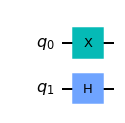

In [3]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.draw(output="mpl")

# mesaure_all

- adds the mesaurements to all the qubits
- If the classical bits are not specified, it also adds new classical bits in the circuit

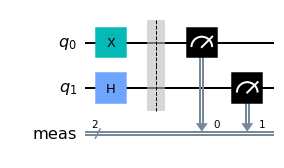

In [4]:
qc.measure_all()
qc.draw(output="mpl")

In [5]:
qc.size()

4

In [6]:
qc.clbits

[Clbit(ClassicalRegister(2, 'meas'), 0),
 Clbit(ClassicalRegister(2, 'meas'), 1)]

# measure

- adds the mesaurement from each qunatum bit to the classical bit
- quantum circuit need to have classical register with classical bits

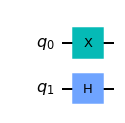

In [7]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.draw(output="mpl")

## qc.measure()

TypeError: measure() missing 2 required positional arguments: 'qubit' and 'cbit'


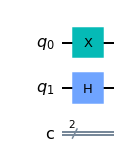

In [8]:
qc=QuantumCircuit(2,2)   # 2 qubits and 2 bits
qc.x(0)
qc.h(1)
qc.draw(output="mpl")

SYNTAX: qc_object.measure(qubit,classical bit)

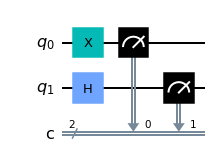

In [9]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output="mpl")

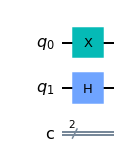

In [10]:
qc=QuantumCircuit(2,2)   # 2 qubits and 2 bits
qc.x(0)
qc.h(1)
qc.draw(output="mpl")

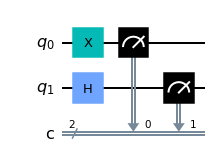

In [11]:
qc.measure([0,1],[0,1])
qc.draw(output="mpl")

## qc.measure_all()   and qc.measure([0,1],[0,1])

- provides same circuit

- qc.measure_all()   : no need of classical register, gets added by default

- qc.measure([0,1],[0,1]) : need of classical register in the quantum circuit

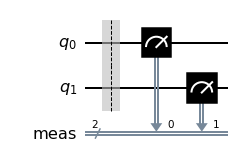

In [12]:
qc=QuantumCircuit(2)
qc.measure_all()
qc.draw(output="mpl")

NOTE: If the quantum circuit has only measurements then the output is shown below:

In [13]:
backend = Aer.get_backend('qasm_simulator')
job=execute (qc, backend)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 1024}


### Another method:

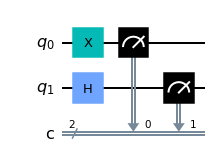

In [14]:
qc=QuantumCircuit(2,2)   # 2 qubits and 2 bits
qc.x(0)
qc.h(1)
qc.measure(range(2),range(2))
qc.draw(output="mpl")

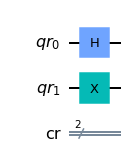

In [15]:
q=QuantumRegister(2,'qr')
c=ClassicalRegister(2,'cr')
qc=QuantumCircuit(q,c)
qc.h(0)
qc.x(1)
qc.draw(output="mpl")

***
# Reset of qubits
***

- It is not a gate
- It is irreversible
- We can apply 

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reset.html#qiskit.circuit.QuantumCircuit.reset

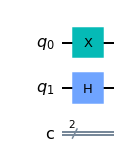

In [16]:
qc=QuantumCircuit(2,2)   # 2 qubits and 2 bits
qc.x(0)
qc.h(1)
qc.draw(output="mpl")

In [17]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

In [18]:
qc.reset(1)

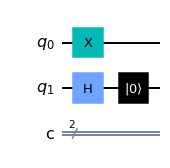

In [19]:
qc.draw(output="mpl")

In [20]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

### We can apply reset in middle of the instructions

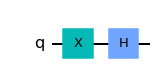

In [21]:
qc=QuantumCircuit(1)   
qc.x(0)
qc.h(0)
qc.draw(output="mpl")

In [22]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

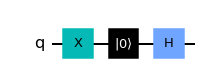

In [23]:
qc=QuantumCircuit(1)   # 2 qubits and 2 bits
qc.x(0)
qc.reset(0)
qc.h(0)
qc.draw(output="mpl")

In [24]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

***
# Conditional opertion : c_if
***

https://qiskit.org/documentation/stubs/qiskit.circuit.Instruction.html

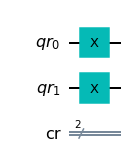

In [25]:
qr=QuantumRegister(2,'qr')
cr=ClassicalRegister(2,'cr')

qc=QuantumCircuit(qr,cr)   # 2 qubits and 2 bits
qc.x(0)
qc.x(1)
qc.draw(output="mpl")

In [26]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

### In this example , s gate will be applied to qubit1 only when cr==0

## SYNTAX : c_if(classical bit,value)

checks for the equality condition between clbit(register) and value

In [27]:
qc.s(qr[1]).c_if(cr,0)

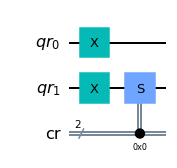

In [28]:
qc.draw(output="mpl")

In [29]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

### Another example:
    Use conditional operation after measure

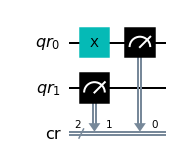

In [30]:
qr=QuantumRegister(2,'qr')
cr=ClassicalRegister(2,'cr')

qc=QuantumCircuit(qr,cr)   # 2 qubits and 2 bits
qc.x(0)

qc.measure([0,1],[0,1])
qc.draw(output="mpl")

In [31]:
qasm_sim(qc)

{'01': 1024}

### In this example , s gate will be applied to qubit1 only when cr==1

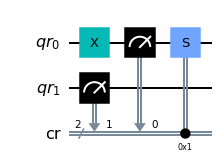

In [32]:
qc.s(qr[0]).c_if(cr,1)
qc.draw(output="mpl")

In [33]:
qasm_sim(qc)

{'01': 1024}

### In this example , x gate will be applied to qubit1 only when cr==1

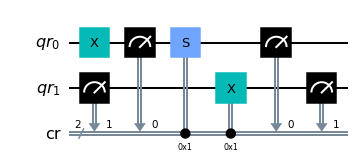

In [34]:
qc.x(qr[1]).c_if(cr,1)
qc.measure([0,1],[0,1])
qc.draw(output="mpl")

In [35]:
qasm_sim(qc)

{'11': 1024}